In [64]:
#Import Pandas and OS for Reading CSV Data
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Gets current working directory
cwd = os.getcwd()
# Name of file
maleFile = "ANSUR_II_MALE_Public.csv"
femaleFile = "ANSUR_II_FEMALE_Public.csv"
# Creates File path
malePath = os.path.join(cwd,maleFile)
femalePath = os.path.join(cwd,femaleFile)
# Loads the Files into pandas
dfM = pd.read_csv(malePath,encoding='latin-1')
dfF = pd.read_csv(femalePath,encoding='latin-1')

Text(0.5, 1.0, 'Female Weight')

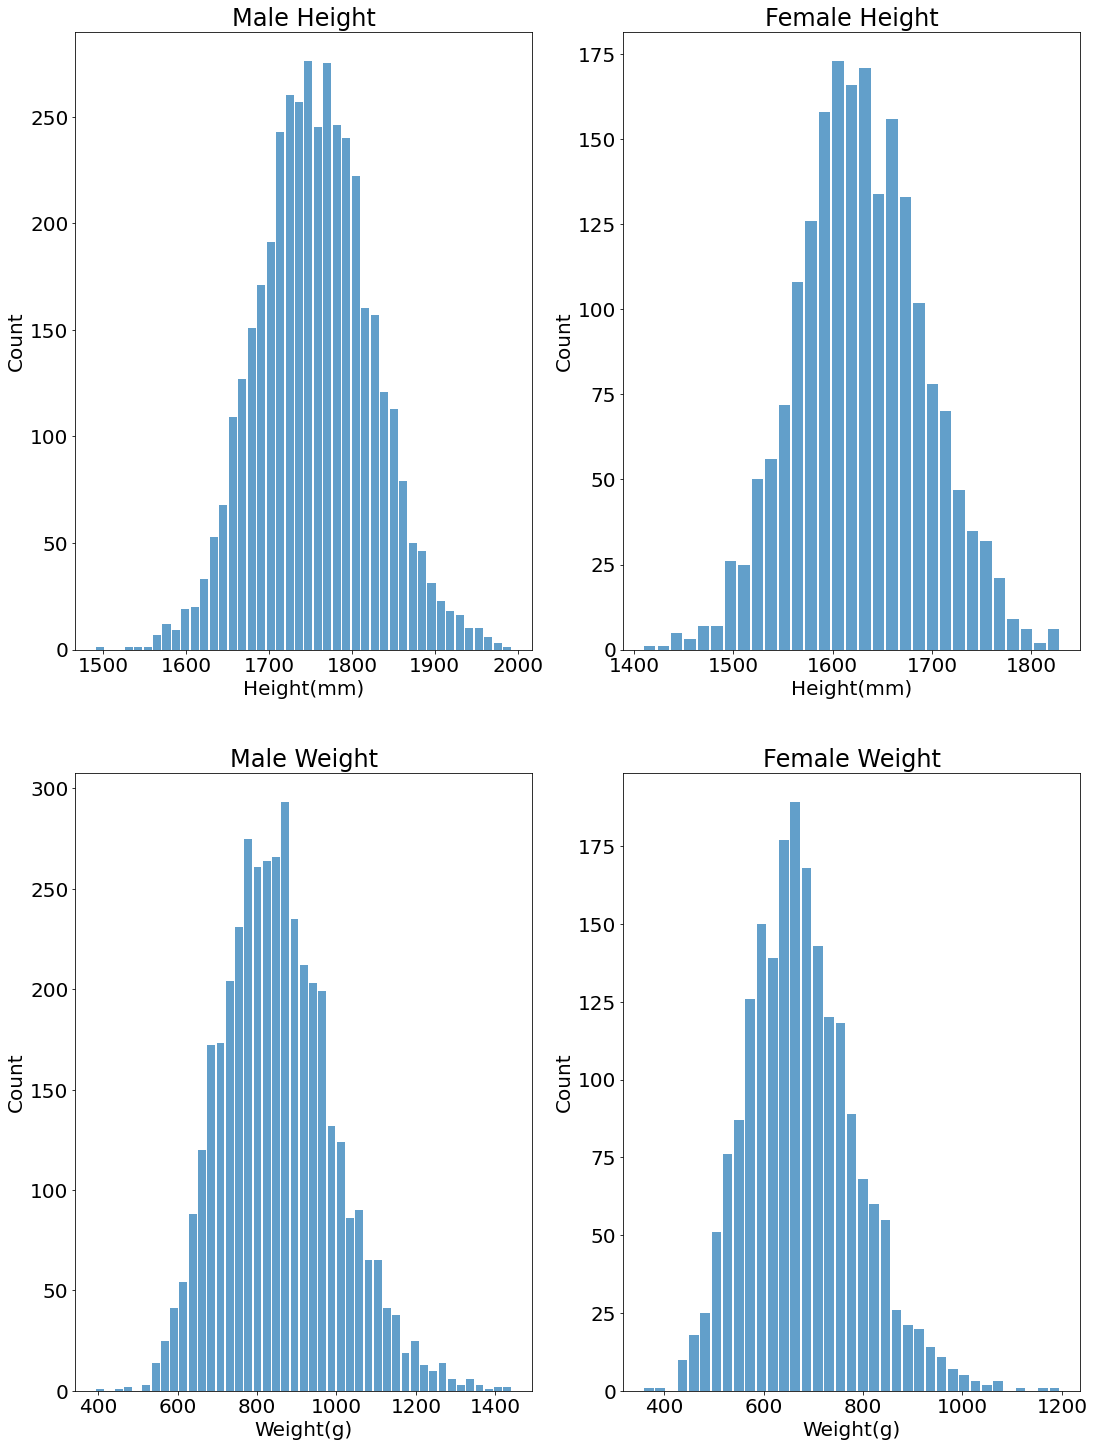

In [69]:
heightM = dfM.stature
heightF = dfF.stature
weightM = dfM.weightkg
weightF = dfF.weightkg

plt.subplot(2,2,1)
plt.rcParams.update({'figure.figsize':(18,25)})
plt.rcParams.update({'font.size':20})
n,bins,patches = plt.hist(x=heightM,bins='auto',alpha=0.7,rwidth=0.85)
plt.xlabel('Height(mm)')
plt.ylabel('Count')
plt.title('Male Height')

plt.subplot(2,2,2)
n,bins,patches = plt.hist(x=heightF,bins='auto',alpha=0.7,rwidth=0.85)
plt.xlabel('Height(mm)')
plt.ylabel('Count')
plt.title('Female Height')

plt.subplot(2,2,3)
plt.rcParams.update({'font.size':20})
n,bins,patches = plt.hist(x=weightM,bins='auto',alpha=0.7,rwidth=0.85)
plt.xlabel('Weight(g)')
plt.ylabel('Count')
plt.title('Male Weight')

plt.subplot(2,2,4)
n,bins,patches = plt.hist(x=weightF,bins='auto',alpha=0.7,rwidth=0.85)
plt.xlabel('Weight(g)')
plt.ylabel('Count')
plt.title('Female Weight')

In [82]:
bmiM = (weightM/10)/np.power(heightM/10,2)*10000
bmiF = (weightF/10)/np.power(heightF/10,2)*10000
print('Mean Male BMI:',"%.2f" % np.mean(bmiM))
print('Mean Female BMI:',"%.2f" % np.mean(bmiF))

Mean Male BMI: 27.69
Mean Female BMI: 25.50


In [136]:
#Variables I believe could reasonbly be measured by radar
selVars = [
    "abdominalextensiondepthsitting","acromionradialelength","biacromialbreadth",
    "bideltoidbreadth","bitragionchinarc","bitragionsubmandibulararc","bizygomaticbreadth",
    "cervicaleheight","chestbreadth","elbowrestheight","eyeheightsitting","forearmhandlength",
    "headbreadth","headcircumference","headlength","hipbreadthsitting","interpupillarybreadth",
    "interscyei","mentonsellionlength","radialestylionlength","shoulderelbowlength","shoulderlength",
    "sittingheight","waistbreadth"
]

In [157]:
# Creates new dataframe with only the selected variables
dfTrnM = dfM[selVars]
dfTrnF = dfF[selVars]

# Randomly select males so that males and females are equally represented
numM = dfTrnM.shape[0]
numF = dfTrnF.shape[0]

# Combines the datasets while balancing number of male and female samples
dfTrn = pd.concat([dfTrnM.sample(numF,replace=False),dfTrnF])

# Calculates the Pearson Correlation between each column
colCorr = dfTrn.corr()
colCorrNP = colCorr.to_numpy()
np.fill_diagonal(colCorrNP,0)
indIsCor = np.argwhere(np.greater(np.triu(colCorrNP),0.85))

for ind in np.arange(0,indIsCor.shape[0]):
    print(selVars[indIsCor[ind,0]],'is correlated with',selVars[indIsCor[ind,1]],)


abdominalextensiondepthsitting is correlated with waistbreadth
acromionradialelength is correlated with cervicaleheight
acromionradialelength is correlated with shoulderelbowlength
bitragionchinarc is correlated with bitragionsubmandibulararc
cervicaleheight is correlated with forearmhandlength
cervicaleheight is correlated with shoulderelbowlength
eyeheightsitting is correlated with sittingheight
forearmhandlength is correlated with radialestylionlength
forearmhandlength is correlated with shoulderelbowlength


(44, 2)

In [118]:
colCorrNP>0

TypeError: '>' not supported between instances of 'NoneType' and 'int'

In [140]:
np.round(indIsCor.shape[0]/2).astype(int)

25

In [141]:
indIsCor.shape[0]

50

In [151]:
colCorrNP

array([[ 0.00000000e+00,  3.37250407e-01,  4.28781845e-01,
         7.31327464e-01,  5.23538045e-01,  6.12130363e-01,
         4.94243972e-01,  3.58693726e-01,  6.42806406e-01,
         2.37291411e-01,  2.95691354e-01,  3.32824188e-01,
         3.38209528e-01,  3.52646674e-01,  3.45098995e-01,
         5.10485579e-01,  2.56094743e-01,  6.10263568e-01,
         3.20359691e-01,  3.13756647e-01,  3.13674305e-01,
         2.25498831e-01,  2.91387553e-01,  8.57512396e-01],
       [ 3.37250407e-01,  0.00000000e+00,  6.87642619e-01,
         5.92040981e-01,  5.49984139e-01,  5.48136057e-01,
         4.56908691e-01,  8.73636921e-01,  4.91381045e-01,
        -2.88851766e-03,  6.55798113e-01,  8.47664192e-01,
         3.62927351e-01,  4.16324355e-01,  5.17695406e-01,
         6.74110124e-02,  3.45264326e-01,  5.03493113e-01,
         5.10048588e-01,  8.09434855e-01,  9.67517896e-01,
         5.29046329e-01,  6.64489190e-01,  3.95643467e-01],
       [ 4.28781845e-01,  6.87642619e-01,  0.00000000e